<a href="https://colab.research.google.com/github/licTomasPerez/Spin-Chains-/blob/main/corr_xop_v._pop_Heisenberg_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
https://qutip.org/docs/latest/guide/dynamics/dynamics-master.html

SyntaxError: ignored

In [3]:
m!pip install matplotlib
!pip install qutip
!pip install numpy 
!pip install math 
!pip install cmath

     |████████████████████████████████| 14.7 MB 4.3 MB/s 
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
ERROR: Could not find a version that satisfies the requirement cmath (from versions: none)
ERROR: No matching distribution found for cmath


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath 
from qutip import *

In [5]:
### XYZ Heisenberg model

solver = "me"   
N = 5            # número de spines

h  = 1.0 * 2 * np.pi * np.ones(N) 
Jz = 0.1 * 2 * np.pi * np.ones(N)
Jx = 0.15 * 2 * np.pi * np.ones(N)
Jy = 0.25 * 2 * np.pi * np.ones(N)

In [45]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver):
    
    id2 = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))

    sxsx_list = [sx_list[n]*sx_list[m] for n in range(N) for m in range(N)]
    sysy_list = [sy_list[n]*sy_list[m] for n in range(N) for m in range(N)]
        
    # no es terriblemente eficiente pero funca al menos
    # for n in range(N):
    #  for m in range(N):
    #    sxsx_list.append(sx_list[n]*sx_list[m])
    #    sysy_list.append(sy_list[n]*sy_list[m])

    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    
    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    
    if solver == "me":
        result_spin_ops = mesolve(H, psi0, tlist, c_op_list, sz_list)
    elif solver == "mc":
        ntraj = 200 
        result_spin_ops = mcsolve(H, psi0, tlist, c_op_list, sz_list)

    return result_spin_ops.expect


In [46]:
# dephasing rate
gamma = 5 * 10**-10* np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
for n in range(2):
    psi_list.append(basis(2,0))
psi_list.append(basis(2,1))
for n in range(2):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 10, 100)

results = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)

#sz_results = results.expect[0]
sz_results = results
#sysy_results = spin_ops_expt.expect[2]

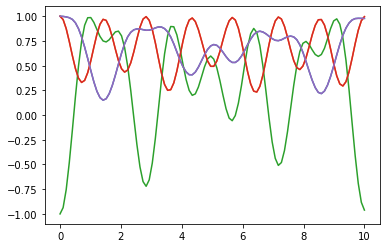

In [47]:
#sigma_z evolucionado 
fig, ax = plt.subplots()

for n in range(N):
    ax.plot(tlist, np.real(sz_results[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

plt.show()


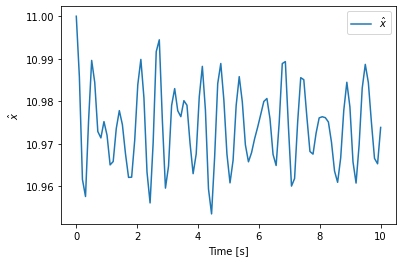

In [56]:
#x_op = sum((.5 + sz_results[i])*i for i in range(N))

x_op_expt = sum((.5 + sz_results[i]) * i for i in range(N))


fig,ax = plt.subplots()
ax.plot(tlist, x_op_expt, label=r'$\hat{x}$')

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\hat{x}$')
plt.show()

In [ ]:
x_op = sum((.5 + sz_list[i])*i for i in range(N))

def W(a,b, k_max): 
    return sum(e**(1j * k * 2 * pi * (a-b) * N**-1)*(k*2*pi*N**-1) for k in range(k_max))

p_op = (sum(W(i,j,10)*(sxsx_list[i]*sxsx_list[j]+sysy_list[i]*sysy_list[j]) for i in range(N) for j in range(N)))

corr_xop_pop = [.5*(x_op[i] * p_op[i] + p_op[i] * x_op[i]) for i in range(len(x_op))]


In [ ]:
def hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver):
    
    id2 = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        operator_list = []
        for m in range(N):
            operator_list.append(id2)
        operator_list[n] = sx
        sx_list.append(tensor(operator_list))
        
        operator_list[n] = sy
        sy_list.append(tensor(operator_list))
        
        operator_list[n] = sz
        sz_list.append(tensor(operator_list))

    sxsx_list = []
    sysy_list = []
    
    # no es terriblemente eficiente pero funca al menos
    for n in range(N):
      for m in range(N):
        sxsx_list.append(sx_list[n]*sx_list[m])
        sysy_list.append(sy_list[n]*sy_list[m])
  
    # Constructing the Hamiltonian
    
    H = 0
    
    for n in range(N):
        H += -0.5*h[n]*sz_list[n]
        
    for n in range(N-1):
        H += -0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += -0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += -0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    
    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])
    
    if solver == "me":
        result_spin_ops = mesolve(H, psi0, tlist, c_op_list, sxsx_list)
    elif solver == "mc":
        ntraj = 200 
        result_spin_ops = mcsolve(H, psi0, tlist, c_op_list, sxsx_list, ntraj)

    return sxsx_list


In [ ]:
# dephasing rate
gamma = 5 * 10**-10* np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
for n in range(2):
    psi_list.append(basis(2,0))
psi_list.append(basis(2,1))
for n in range(2):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 10, 100)

spin_ops_expt = hamiltonian(N, Jx, Jy, Jz, h, psi0, tlist, gamma, solver)


In [ ]:
print(spin_ops_expt)

Result object with mesolve data.
--------------------------------
expect = True
num_expect = 25, num_collapse = 5


In [ ]:
from cmath import * 
from math import * 

def W(a,b, k_max): 
  return sum(e**(1j * k * (a-b))*k for k in range(k_max))

W(1,1, 10)

(45+0j)

In [ ]:
x_op = sum((.5 + sz_expt[i])*i for i in range(N))

def W(a,b, k_max): 
  return sum(e**(1j * k * 2 * pi * (a-b) * N**-1)*(k*2*pi*N**-1) for k in range(k_max))

p_op = np.real(sum(W(i,j,10)*(sx_expt[i]*sx_expt[j]+sy_expt[i]*sy_expt[j]) for i in range(N) for j in range(N)))

corr_xop_pop = .5*(x_op * p_op + p_op * x_op)


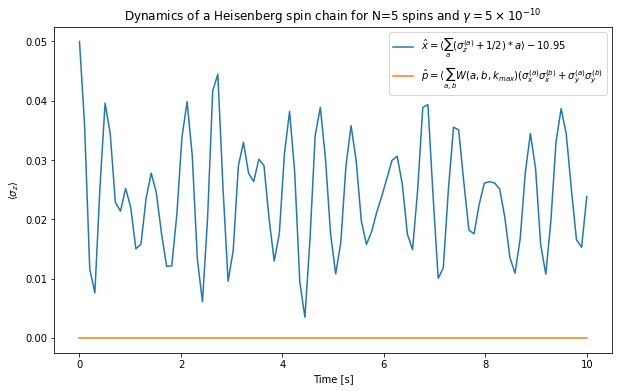

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(tlist, x_op-10.95, label=r'$\hat{x}= \langle \sum_{a}(\sigma_z^{(a)}+1/2)*a\rangle - 10.95$')
ax.plot(tlist, p_op, label=r'$\hat{p}= \langle \sum_{a,b}W(a,b,k_{max})(\sigma_x^{(a)}\sigma_x^{(b)}+\sigma_y^{(a)}\sigma_y^{(b)}}))\rangle$')

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=5 spins and $\gamma = 5\times 10^{-10} $');

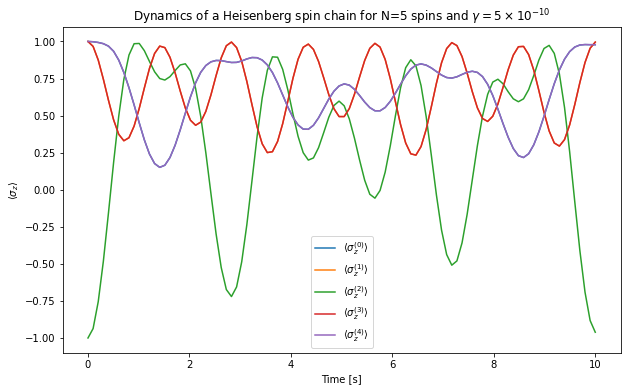

In [ ]:
 fig, ax = plt.subplots(figsize=(10,6))

for n in range(N):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain for N=5 spins and $\gamma = 5\times 10^{-10} $');

Here we are interested in computing the following expression

$$
\mu_X = \frac{\bigg(\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}\bigg)i}{\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}}
$$

and the standard deviation is 


$$
\sigma^2_X= \frac{\bigg(\sum_{i=1}^N\langle s_{z}^{i} \rangle+ \frac{1}{2}\bigg)i^2}{\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}} - \bigg[\frac  {\bigg(\sum_{i=1}^N\langle s_{z}^{i} \rangle+ \frac{1}{2}\bigg)i}{\sum_{i=1}^N\langle s_z^i \rangle+ \frac{1}{2}}\bigg]^2
$$

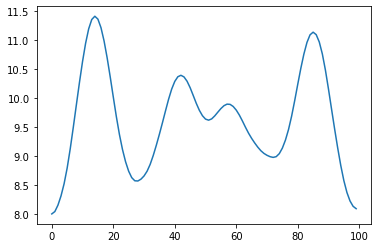

In [ ]:
denom_muX = sum(.5*(1-sz_expt[i]) for i in range(5))
mu_X= sum(.5*(1-sz_expt[i])*i for i in range((5)))/denom_muX
std_devX_term1 = sum(.5*(1-sz_expt[i])*i**2 for i in range((5)))/denom_muX
std_devX_term2 = mu_X**2

std_devX = std_devX_term1 + std_devX_term2


plt.plot(std_devX)

In [ ]:
def func(x,y):
  return x+y, x+y**2

a, b = func(2,3)
c, d = func(1,1) 
a, b = func(a+b,c+d)

In [ ]:
A=[1,2]
B=[2,1]

l = []
for i in range(2):
  for j in range(2):
   l.append(A[i]*B[j])

l

[2, 1, 4, 2]

In [ ]:
A=[1,2]
B=[2,1]

l = []
for i in range(2):
   l.append(A[i]*B[i])

l

[2, 2]